# Wstęp
Stworzone są nastepujące wykresy:
- Rozkład głównych emocji
- Rozkład podrzędnych emocji
- Rozkład par emocji (głowna, podrzędna)


In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

con = sqlite3.connect("game_database.db")
cur = con.cursor()

sql_query = '''SELECT * FROM PlayerEmotions'''

df = pd.read_sql_query(sql_query, con)

# change values between columns player_z and face_confidence;
df['player_z'], df['face_confidence'] = df['face_confidence'], df['player_z']

# filter out the rows where the face_confidence is less than 0.9
df = df[df['face_confidence'] >= 0.9]
print(df.head())

    game_id first_emotion  first_emotion_value second_emotion  \
0         1          fear            45.392414        neutral   
1         2       neutral            81.479507           fear   
52        5       neutral            57.537796           fear   
53        6           sad            48.889812        neutral   
54        6           sad            45.650993        neutral   

    second_emotion_value    player_z  face_confidence  
0              36.102718  403.507904             1.00  
1              12.564404  493.300873             0.98  
52             21.218596  471.958038             1.00  
53             40.852928    3.492020             1.00  
54             26.396259  133.525665             0.99  


# Plotting

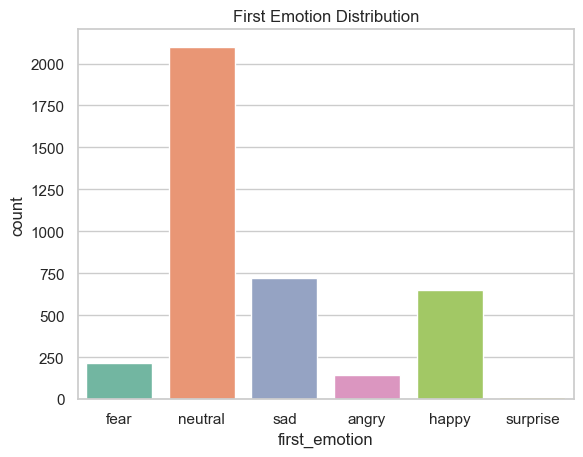

In [9]:
# Plot first_emotion and second_emotion distribution
sns.set_theme(style='whitegrid')
sns.countplot(x='first_emotion', data=df, palette='Set2')
plt.title('First Emotion Distribution')
plt.show()

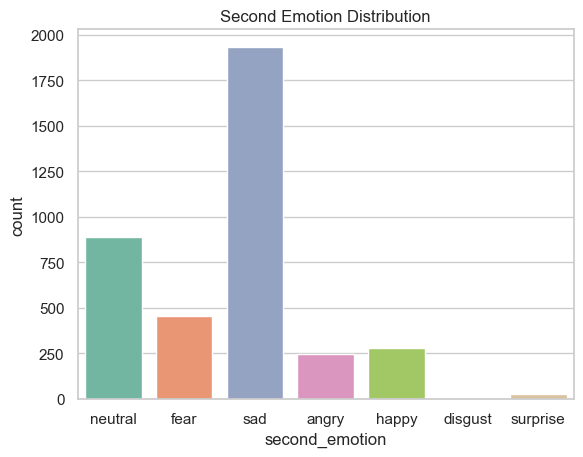

In [17]:
# plot second_emotion distribution
sns.set_theme(style='whitegrid')
sns.countplot(x='second_emotion', data=df, palette='Set2')
plt.title('Second Emotion Distribution')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'neutral sad'),
  Text(1, 0, 'sad neutral'),
  Text(2, 0, 'happy neutral'),
  Text(3, 0, 'neutral happy'),
  Text(4, 0, 'sad fear'),
  Text(5, 0, 'happy fear'),
  Text(6, 0, 'sad angry'),
  Text(7, 0, 'neutral fear'),
  Text(8, 0, 'neutral angry'),
  Text(9, 0, 'fear sad'),
  Text(10, 0, 'happy sad'),
  Text(11, 0, 'angry sad'),
  Text(12, 0, 'angry fear'),
  Text(13, 0, 'fear neutral'),
  Text(14, 0, 'fear angry'),
  Text(15, 0, 'fear happy'),
  Text(16, 0, 'sad happy'),
  Text(17, 0, 'angry neutral'),
  Text(18, 0, 'happy angry'),
  Text(19, 0, 'fear surprise'),
  Text(20, 0, 'happy surprise'),
  Text(21, 0, 'angry happy'),
  Text(22, 0, 'surprise fear'),
  Text(23, 0, 'neutral surprise'),
  Text(24, 0, 'angry disgust'),
  Text(25, 0, 'surprise neutral'),
  Text(26, 0, 'angry surprise'),
  Text(27, 0, 'sad surprise'),
  Text(28, 0, 'surpri

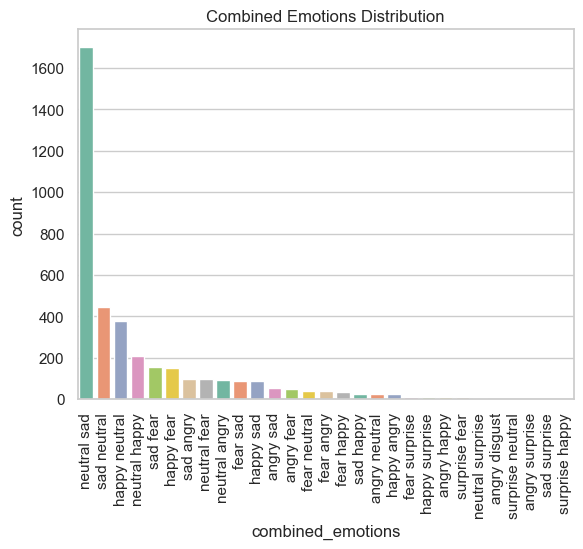

In [16]:
# plot the count plot of combined emotions
df['combined_emotions'] = df['first_emotion'] + ' ' + df['second_emotion']
sns.countplot(x='combined_emotions', data=df, palette='Set2', order=df['combined_emotions'].value_counts().index)
plt.title('Combined Emotions Distribution')

# tilt the x-axis labels
plt.xticks(rotation=90)

# sort the x-axis labels
